In [23]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [24]:
train_folder_path="./data/entrenamiento"
data=[]
img_size=150
for img in os.listdir(train_folder_path):
    img = cv2.imread(os.path.join(train_folder_path,img))
    img_resize= cv2.resize(img,(img_size,img_size))
    data.append(img_resize)
Images = np.array(data)
print(Images.shape)

(195, 150, 150, 3)


In [25]:
etq0=np.repeat(0,13)
etq1=np.repeat(1,13)
etq2=np.repeat(2,13)
etq3=np.repeat(3,13)
etq4=np.repeat(4,13)
etq5=np.repeat(5,13)
etq6=np.repeat(6,13)
etq7=np.repeat(7,13)
etq8=np.repeat(8,13)
etq9=np.repeat(9,13)
etq10=np.repeat(10,13)
etq11=np.repeat(11,13)
etq12=np.repeat(12,13)
etq13=np.repeat(13,13)
etq14=np.repeat(14,13)

In [26]:
class_names=['Acer Campestre','Acer Capillipes','Acer Cincinatum','Acer Mono','Acer Opalus','Acer Palmatum','Acer Pictum',
                 'Acer Platanoids','Acer Rubrum','Acer Rufinerve','Acer Saccharinum','Alnus Cordata','Alnus Maximowiczii',
                 'Alnus Rubra','Alnus Sieboldiana']

In [27]:
labels=np.concatenate([etq0,etq1,etq2,etq3,etq4,etq5,etq6,etq7,etq8,etq9,etq10,etq11,etq12,etq13,etq14])
Labels=np.array(labels)
print(Labels.shape)

(195,)


In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(15, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=30)
trained=model.fit(Images, Labels, epochs=50)

Epoch 1/30
7/7 [==============================] - 0s 62ms/step - loss: 9281.9902 - accuracy: 0.0872
Epoch 2/30
7/7 [==============================] - 0s 63ms/step - loss: 7980.3672 - accuracy: 0.2513
Epoch 3/30
7/7 [==============================] - 1s 87ms/step - loss: 2861.4827 - accuracy: 0.4769
Epoch 4/30
7/7 [==============================] - 1s 106ms/step - loss: 1996.8311 - accuracy: 0.6051
Epoch 5/30
7/7 [==============================] - 1s 91ms/step - loss: 790.2624 - accuracy: 0.6872
Epoch 6/30
7/7 [==============================] - 1s 72ms/step - loss: 290.8612 - accuracy: 0.7795
Epoch 7/30
7/7 [==============================] - 1s 81ms/step - loss: 79.1345 - accuracy: 0.8974
Epoch 8/30
7/7 [==============================] - 0s 68ms/step - loss: 165.5728 - accuracy: 0.8410
Epoch 9/30
7/7 [==============================] - 1s 72ms/step - loss: 44.6426 - accuracy: 0.9538
Epoch 10/30
7/7 [==============================] - 1s 91ms/step - loss: 26.6717 - accuracy: 0.9538
Epoch 1

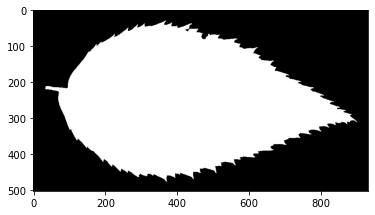

In [44]:
img=cv2.imread("./data/pruebas/Alnus_Sieboldiana_15.ab.jpg")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [46]:
img2=img_cvt
img2=cv2.resize(img2,(img_size,img_size))
#print(img2.shape)
img2=(np.expand_dims(img2,0))
#print(img2.shape)
prediction_single=model.predict(img2)
print("La planta ingresada pertenece a la especie:",class_names[np.argmax(prediction_single)])

La planta ingresada pertenece a la especie: Alnus Sieboldiana
